In [213]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
import os

from utils import read_data, clean_data

#pd.set_option('display.max_rows', None)

## Hom many days in advanced should I book my ticket?

For each day, ticket type calculate mean 

In [311]:
route = 'berlin-memmingen'
age_discount_class = 'Y_4_2'
folder = f'data_{age_discount_class}'

directory = f'data/{route}/{folder}'


In [312]:
df = pd.DataFrame()

for file in os.listdir(directory):
    file_path = os.path.join(directory, file)
    
    df_day = read_data(file_path)
    df_day = clean_data(df_day)
    
    # df_day.drop(df_day[df_day['ticket type'] == 'Super Sparpreis Young'].index, inplace = True)
    #df_day.drop(df_day[df_day['ticket type'] == 'Sparpreis'].index, inplace = True)
    df_day.drop(df_day[df_day['ticket type'] == 'Super Sparpreis 1.Kl'].index, inplace = True)
    df_day.drop(df_day[df_day['ticket type'] == 'Quer-Durchs-Land-Ticket'].index, inplace = True)
    #df_day.drop(df_day[df_day['ticket type'] == 'Flexpreis Plus'].index, inplace = True)
    df_day.drop(df_day[df_day['ticket type'] == 'Flexpreis Plus 1.Kl'].index, inplace = True)
    df_day.drop(df_day[df_day['ticket type'] == 'Flexpreis 1.Kl'].index, inplace = True)
    
    df_day['day'] = pd.to_datetime(df_day['datetime dep']).dt.date
    
    df = pd.concat([df, df_day], ignore_index=True)

#df.info()


In [313]:
# day as index
#multi = df.set_index(['day']).sort_index()
#df_sparpreis = df.loc[df['ticket type'] == 'Sparpreis']
#df_sparpreis.groupby('day').price.mean()
#df = df.drop(df[df['ticket type'] == 'Super Sparpreis Young'])


#df.drop(df[df['Fee'] >= 24000].index, inplace = True)

df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time,day
0,26.90,Super Sparpreis Young,Y,4,Berlin,Memmingen,2,2,2022-12-30 00:22:00,2022-12-30 10:54:00,632.0,00:22,2022-12-30
1,31.40,Sparpreis Young,Y,4,Berlin,Memmingen,2,2,2022-12-30 00:22:00,2022-12-30 10:54:00,632.0,00:22,2022-12-30
2,71.10,Flexpreis,Y,4,Berlin,Memmingen,2,2,2022-12-30 00:22:00,2022-12-30 10:54:00,632.0,00:22,2022-12-30
3,81.90,Flexpreis Plus,Y,4,Berlin,Memmingen,2,2,2022-12-30 00:22:00,2022-12-30 10:54:00,632.0,00:22,2022-12-30
4,23.15,Super Sparpreis,Y,4,Berlin,Memmingen,1,2,2022-12-30 04:28:00,2022-12-30 10:59:00,391.0,04:28,2022-12-30


In [314]:
df = df.sort_values(by=['day'])
df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time,day
3570,35.15,Super Sparpreis Young,Y,4,Berlin,Memmingen,1,2,2022-11-09 21:28:00,2022-11-09 07:01:00,-867.0,21:28,2022-11-09
3506,81.85,Flexpreis,Y,4,Berlin,Memmingen,1,2,2022-11-09 08:30:00,2022-11-09 14:59:00,389.0,08:30,2022-11-09
3507,93.90,Flexpreis Plus,Y,4,Berlin,Memmingen,1,2,2022-11-09 08:30:00,2022-11-09 14:59:00,389.0,08:30,2022-11-09
3508,41.15,Super Sparpreis Young,Y,4,Berlin,Memmingen,1,2,2022-11-09 09:37:00,2022-11-09 15:48:00,371.0,09:37,2022-11-09
3509,47.15,Sparpreis Young,Y,4,Berlin,Memmingen,1,2,2022-11-09 09:37:00,2022-11-09 15:48:00,371.0,09:37,2022-11-09


In [315]:

price_means = df.groupby(['day','ticket type']).price.mean()
price_means = pd.DataFrame(price_means)
#price_means = price_means.sort_values(by=['day'])
#price_means.info()
#price_means

/tmp/ipykernel_18110/2939200022.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


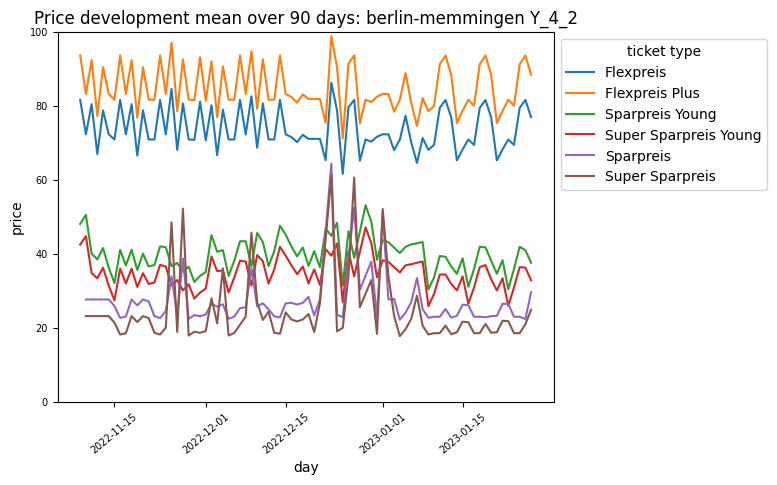

In [316]:
plt = sb.lineplot(data=price_means, x='day', y='price', hue='ticket type')
plt.set_ylim(0, 100)

plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
plt.tick_params(labelsize=7)
title = f'Price development mean over 90 days: {route} {age_discount_class}'
plt.set(title=title)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))



# day not ordered

- Peak around christmas other than that steadily decrease in price for Sparpreis and Super Sparpreis
- Felxpreis and Flexpreis Plus price level remains constant
- However for all ticket types the day of week traveling has a bigger impact on the price than the the number of days in which the ticket is booked in advance

In [317]:
def save_plot(plot, filename):
    sb.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

    fig = plt.get_figure()
    fig.savefig(filename, dpi=200, bbox_inches='tight')

In [318]:
filename = f'plots/question_3/7_days_{route}_{age_discount_class}.png'
save_plot(plt, filename)

how many entries for each day? Maybe some entries went missing when scraping and depending if cheaper or expensive entries go missing mean is higher or lower in the end

maybo also try 

E.g. Saturdays and Tuesdays significately cheaper

Why 

=> Kurz vorher buchen immer schlecht => detailaufnahme mit erster Woche
=> Nur relevant für sparpreise, flexpreise ziemlich konstant
=> 2. Hälfte genaue zeit herausfinden, da nochmal günstiger
besser punktgröße minimieren und nicht mean sondern alle alle einzelnen preise nehmen, mehr aussagekraft

In [239]:

#df = df.loc[df['ticket type'] == 'Super Sparpreis']
df = df.sort_values(by=['datetime dep'])
#df.set_index('day')
df.head()


,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time,day
4141,83.45,Flexpreis Plus,E,4,Berlin,Biberach,2,2,2022-11-07 00:27:00,2022-11-07 10:40:00,613.0,00:27,2022-11-07
4140,72.50,Flexpreis,E,4,Berlin,Biberach,2,2,2022-11-07 00:27:00,2022-11-07 10:40:00,613.0,00:27,2022-11-07
4139,83.45,Flexpreis Plus,E,4,Berlin,Biberach,3,2,2022-11-07 00:27:00,2022-11-07 10:08:00,581.0,00:27,2022-11-07
4138,72.50,Flexpreis,E,4,Berlin,Biberach,3,2,2022-11-07 00:27:00,2022-11-07 10:08:00,581.0,00:27,2022-11-07
4143,83.45,Flexpreis Plus,E,4,Berlin,Biberach,1,2,2022-11-07 05:28:00,2022-11-07 12:40:00,432.0,05:28,2022-11-07


/tmp/ipykernel_18110/2132429687.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


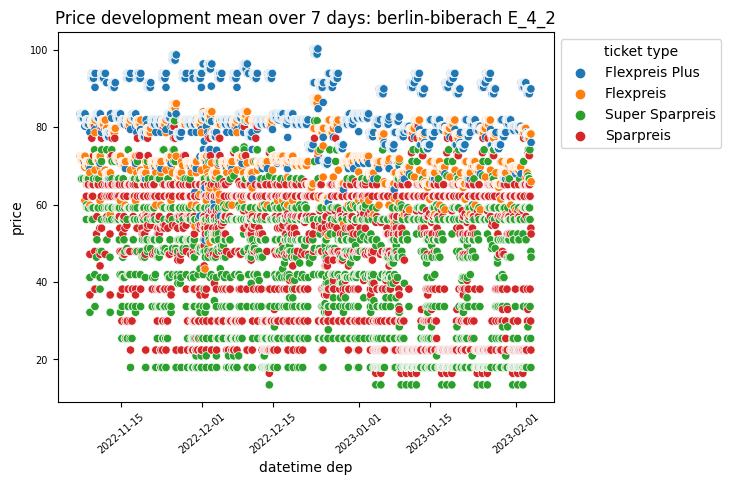

In [240]:
plt = sb.scatterplot(data=df, x='datetime dep', y='price', hue='ticket type')
plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
plt.tick_params(labelsize=7)

plt.set(title=title)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

In [195]:
df.index
# adapt dot size to number of occurences

Int64Index([3807, 3799, 3803, 4021, 2178, 2182, 6897, 4652, 4648, 2276,
            ...
            8703, 8710, 8714, 8734, 8730, 8741, 8745, 8758, 8762, 8766],
           dtype='int64', length=726)

In [196]:
#price_means